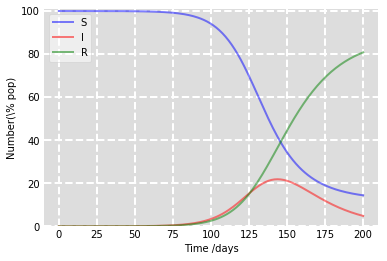

In [4]:
# modified from https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 100000
# Initial number of infected and recovered individuals, I0 and R0.
I0, ρ0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - ρ0
R0 = 2.4
γ=1./17
β=R0*γ
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
# A grid of time points (in days)
t = np.linspace(0, 200,200)

# The SIR model differential equations.
def deriv(y, t, N, β, γ):
    S, I, R = y
    dSdt = -β * S * I / N
    dIdt = β * S * I / N - γ * I
    dRdt = γ * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, ρ0 # \rho0 was called R0 in the code, I changed it since R0 has a different connotation.
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, β, γ))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, 100*S/N, 'b', alpha=0.5, lw=2, label='S')
ax.plot(t, 100*I/N, 'r', alpha=0.5, lw=2, label='I')
ax.plot(t, 100*R/N, 'g', alpha=0.5, lw=2, label='R')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number(\% pop)')
ax.set_ylim(0,101)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='--')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [5]:
R0

2.4